<br><br>

## Exercício clusterização: clusters RFM

<br>

No exercício a seguir, estudaremos um conceito muito interessante e comum no contexto de dados, os __clusters RFM!__

A sigla __RFM__ vem do inglês, significando __recency, frequency and monetary.__ Em português, recência, frequência e valor monetário.

Essa clusterização é muito comum quando o __objetivo é segmentar clientes de uma certa base__ em termos de:

<br>

__Recência__ de compra: há quantos dias foi feita a última compra, relativo a data atual;

__Freqûencia__ de compra: considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;

__Valor monetário__ das compras: qual foi o total gasto, nesta mesma janela de tempo.


<br>

Use a função getData para carregar os dados disponíveis para este exercício.

Esse dataset contém 4 colunas, em que cada linha/istância corresponde a um cliente único de uma certa empresa.

As colunas "rec", "freq" e "valor" indicam a recência, frequência e valor monetário do cliente num período de 120 dias.

Desta forma, por exemplo, um usuário com:

    - recência: 30
    
    - frequência: 5
    
    - valor: 10
    
deve ser interpretado como: um usuário que fez a última compra há 30 dias atrás; que a frequência mensal de compra dele, dentro dos últimos 120 dias foi de 5 vezes; o valor médio gasto, dentro desse período de 120 dias, foi de R$10,00.

<br>

__Exercício:__

Como cientista de dados da empresa, o seu __objetivo__ é __analisar os dados disponíveis__ e procurar pelos __grupos de clientes mais valiosos e menos valiosos__ para a companhia. 

Justifique bastante suas análises e __interprete os resultados.__

Você pode (e deve!) utilizar técnicas de clusterização, como __KMeans__ e __DBSCAN__, bem como criar segmentações a partir de suas __análises exploratórias.__

Lembre-se que, neste contexto não supervisionado, não existe resposta certa e a __criatividade__ é fundamental!

__Obs.:__ Ao utilizar o KMeans e o DBSCAN, lembre-se de normalizar os dados antes de aplicar os algoritmos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def getData():
    return pd.read_csv("dataframe_exercicio_clusterizacao_RFM.csv")

In [2]:
#Análise exploratória e pré-processamento dos dados
df = getData()
dff = df.copy() #cópia do dataset p/ testes k-means
df

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067
...,...,...,...,...
1007,1008,50.0,6.0,116.867455
1008,1009,72.0,4.0,94.807854
1009,1010,50.0,5.0,99.187523
1010,1011,81.0,2.0,66.581900


In [3]:
df.describe()

,user,rec,freq,valor
count,1012.000000,1012.000000,1012.000000,1012.000000
mean,506.500000,45.064229,4.524704,109.568915
std,292.283538,26.471133,2.423586,125.013542
min,1.000000,1.000000,1.000000,10.859150
25%,253.750000,23.000000,2.000000,57.097928
50%,506.500000,45.000000,5.000000,103.561817
75%,759.250000,68.000000,7.000000,152.704398
max,1012.000000,118.000000,17.000000,3241.824119


In [4]:
print("Total de usuários:", df.user.count())
print("\nTotal de informação nula na base:",df.isnull().sum().sum())
print("\nTotal de nulos por variável:\n", df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending= False))
print("\nTotal de linhas completamente preenchidas:", df.dropna().shape[0])

Total de usuários: 1012

Total de informação nula na base: 0

Total de nulos por variável:
 Series([], dtype: int64)

Total de linhas completamente preenchidas: 1012


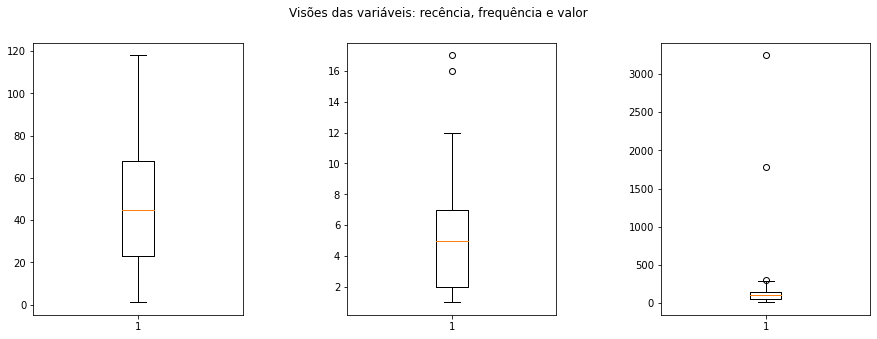

In [5]:
#Verifica-se alguns outliers nas variáveis: frequência e valor
fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace= 0.5)
plt.suptitle('Visões das variáveis: recência, frequência e valor')
plt.subplot(1,3,1)
plt.boxplot(df.rec)
plt.subplot(1,3,2)
plt.boxplot(df.freq)
plt.subplot(1,3,3)
plt.boxplot(df.valor)
plt.show()

In [6]:
#Correlação entre as variáveis
df.corr()

,user,rec,freq,valor
user,1.000000,0.003080,-0.000657,-0.019787
rec,0.003080,1.000000,-0.019119,0.090110
freq,-0.000657,-0.019119,1.000000,-0.061690
valor,-0.019787,0.090110,-0.061690,1.000000


<AxesSubplot:>

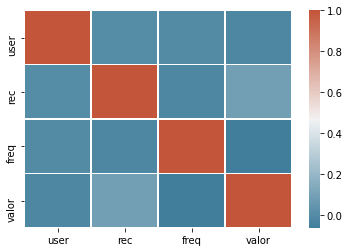

In [7]:
#É possível verificar que não existe uma correlação substancial entre as variáveis
corr = df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap=cmap, linewidths=.5)

In [8]:
#Análise RFM

#Recência de compra: há quantos dias foi feita a última compra, relativo a data atual;
#Freqûencia de compra: considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;
#Valor monetário das compras: qual foi o total gasto, nesta mesma janela de tempo.

#Atribui uma pontuação de 1 a 5 para cada recência, frequência e valor dos clientes.
#Abaixo está a conversão de colunas em pontuações rfm em que '5' é a maior pontuação e '1' a menor.

#Quanto maior o valor, maior é a pontuação, ou seja,'5';
#Menor valor de recência indica compras recentes, portanto, leva o maior valor de 5;
#A frequência é a mesma que em valor, quanto maior a frequência, maior a pontuação.

In [9]:
df["rec_score"] = pd.qcut(df['rec'], 5, labels=[5, 4, 3, 2, 1])

df["freq_score"] = pd.qcut(df['freq'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
df["valor_score"] = pd.qcut(df['valor'], 5, labels=[1, 2, 3, 4, 5])
df['score']=df['rec_score'].astype(int)+df['freq_score'].astype(int)+df['valor_score'].astype(int)

In [10]:
df.head()

,user,rec,freq,valor,rec_score,freq_score,valor_score,score
0,1,15.0,7.0,196.881015,5,4,5,14
1,2,51.0,6.0,162.408892,3,4,4,11
2,3,80.0,5.0,180.158644,1,3,5,9
3,4,38.0,4.0,156.048130,3,2,4,9
4,5,19.0,6.0,164.052067,4,4,5,13


In [11]:
#Clientes mais valiosos
#Utilizando o score acima pode-se relacionar os clientes mais valiosos para a empresa
#Ou seja, aqueles que alcançaram o score de 15pts., sendo os mais ativos na empresa

df[df['score']== 15].sort_values('valor', ascending=False).head()

,user,rec,freq,valor,rec_score,freq_score,valor_score,score
187,188,7.0,11.0,299.624773,5,5,5,15
314,315,2.0,9.0,291.666395,5,5,5,15
457,458,3.0,10.0,282.813342,5,5,5,15
983,984,4.0,11.0,266.919519,5,5,5,15
199,200,3.0,8.0,254.348782,5,5,5,15


In [12]:
#14 clientes podem ser considerados os mais valiosos, gerando alta receita e comprando com mais frequência
df[df['score']==15].count()

user           14
rec            14
freq           14
valor          14
rec_score      14
freq_score     14
valor_score    14
score          14
dtype: int64

In [13]:
#Separando os clientes por nível (Ativo, Bom, Médio e Inativo) com base na sua pontuação

#Ativo: alta geração de receita e compram com frequência;
#Bom: compras bastante frequentes e geração de receita média;
#Médio: menos ativos, com pouca frequência de compra de baixa geração de receita;
#Inativo: geram receita muito baixa e compram ocasionalmente.

def rfm_level(score):
    if  ((score >1) and (score < 4)):
        return 'Inativo'
    elif ((score >3) and (score < 8)):
        return 'Médio'
    elif ((score > 7) and (score <11)):
        return 'Bom'
    else:
        return 'Ativo'

In [14]:
df['classificacao'] = df['score'].apply(lambda score : rfm_level(score))
df.head()

,user,rec,freq,valor,rec_score,freq_score,valor_score,score,classificacao
0,1,15.0,7.0,196.881015,5,4,5,14,Ativo
1,2,51.0,6.0,162.408892,3,4,4,11,Ativo
2,3,80.0,5.0,180.158644,1,3,5,9,Bom
3,4,38.0,4.0,156.048130,3,2,4,9,Bom
4,5,19.0,6.0,164.052067,4,4,5,13,Ativo


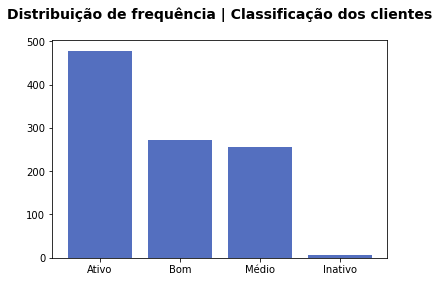

In [15]:
#Visualizando o nº de clientes por nível/classificação
#Pode-se inferir, a partir do gráfico, que a empresa tem bons clientes no geral,
#considerando que a maioria deles se enquadra em clientes ativos ou bons, verificando-se
#um baixo número de clientes inativos.

plt.bar(df.classificacao.unique(), df.classificacao.value_counts(), color = '#546FBF')
plt.title('Distribuição de frequência | Classificação dos clientes\n', {'fontsize': 14,'fontweight': 'bold'})
plt.show()

In [16]:
df.groupby('classificacao').agg({
    'rec' : ['mean', 'min','max'],
    'freq' : ['mean', 'min','max'],
    'valor' : ['mean','min','max','count']
})

rec                   freq                  valor  \
                    mean   min    max      mean  min   max        mean   
classificacao                                                            
Ativo          25.660517   1.0   88.0  6.188192  1.0  17.0  140.637583   
Bom            45.251046   1.0   90.0  4.433054  1.0   8.0  104.419202   
Inativo        78.428571  73.0   85.0  1.285714  1.0   2.0   28.412216   
Médio          64.343750   5.0  118.0  3.023438  1.0   8.0   88.514428   

                                             
                     min          max count  
classificacao                                
Ativo          11.549768   299.624773   271  
Bom            11.245200   199.941698   478  
Inativo        15.416968    47.287083     7  
Médio          10.859150  3241.824119   256

In [17]:
#Utilizando K-means

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

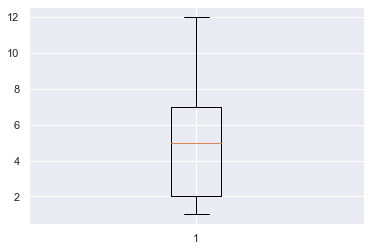

In [35]:
#Agora, aplicando aprendizado de máquina não supervisionado, pode-se identificar 
#diferentes clusters com base na segmentação de clientes a partir de seu comportamento de compra.

#Como verificado no início deste exercício, alguns outiers foram detectados, mostrando a 
#necessidade de tratá-los apropriadamente

#Tratamento de outliers na variável frequência ('freq'):
plt.boxplot(dff.freq)
Q1 = dff.freq.quantile(0.25)
Q3 = dff.freq.quantile(0.75)
IQR = Q3 - Q1
dff = dff[(dff.freq >= Q1 - 1.5*IQR) & (dff.freq <= Q3 + 1.5*IQR)]

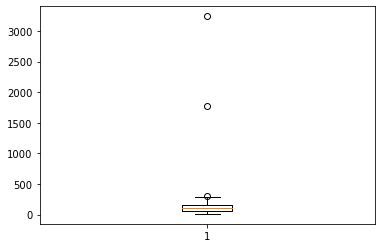

In [19]:
#Tratamento de outliers na variável 'valor':

plt.boxplot(dff.valor)
Q1 = dff.valor.quantile(0.25)
Q3 = dff.valor.quantile(0.75)
IQR = Q3 - Q1
rfm = dff[(dff.valor >= (Q1 - 1.5*IQR)) & (dff.valor <= (Q3 + 1.5*IQR))]

In [21]:
#Normalização dos dados

dff_norm = dff[['rec','freq','valor']]
scaler = StandardScaler()
x_scaled = scaler.fit(dff_norm)
x_scaled = scaler.fit_transform(dff_norm)
x_scaled

array([[-1.1407629 ,  1.05653834,  0.70064121],
       [ 0.22163286,  0.63375557,  0.42477396],
       [ 1.31911834,  0.21097279,  0.56681845],
       ...,
       [ 0.18378854,  0.21097279, -0.08116256],
       [ 1.35696267, -1.05737554, -0.34209293],
       [-0.53525367, -1.05737554,  0.1589291 ]])

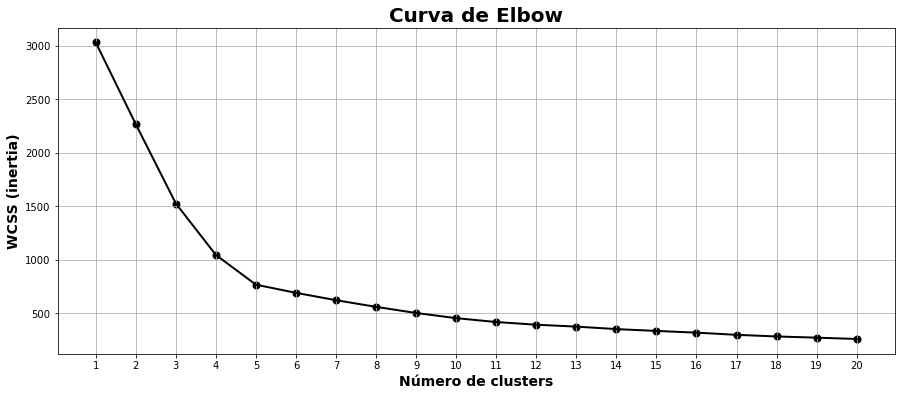

In [22]:
#Definindo a quantidade ideal de clusters - Curva de Elbow

l=[]
for k in range(1, 21):
    km = KMeans(n_clusters=k)
    km.fit(x_scaled)
    l.append(km.inertia_)

plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.xticks(range(1,1+len(l)))
plt.grid()
plt.show()

#COMENTÁRIOS:
#No gráfico da curva de elbow, relacionado abaixo, observa-se que o número ideal para este estudo são 4 clusters,
#pois este é exatamente o ponto em que a WCSS começa a cair de forma mais suave. 

In [23]:
km = KMeans(n_clusters=4).fit(x_scaled)

In [45]:
dff['km4'] = km.predict(x_scaled)
dff

,user,rec,freq,valor,km4
0,1,15.0,7.0,196.881015,3
1,2,51.0,6.0,162.408892,3
2,3,80.0,5.0,180.158644,1
3,4,38.0,4.0,156.048130,0
4,5,19.0,6.0,164.052067,3
...,...,...,...,...,...
1007,1008,50.0,6.0,116.867455,3
1008,1009,72.0,4.0,94.807854,1
1009,1010,50.0,5.0,99.187523,3
1010,1011,81.0,2.0,66.581900,1


In [59]:
dff.describe()

,user,rec,freq,valor,km4
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,507.139604,45.143564,4.500990,109.329523,1.440594
std,292.218372,26.437131,2.366453,125.021003,1.278369
min,1.000000,1.000000,1.000000,10.859150,0.000000
25%,255.250000,23.000000,2.000000,56.891056,0.000000
50%,507.500000,45.000000,5.000000,103.371429,1.000000
75%,759.750000,68.000000,7.000000,152.404221,3.000000
max,1012.000000,118.000000,12.000000,3241.824119,3.000000


<AxesSubplot:xlabel='km4', ylabel='rec'>

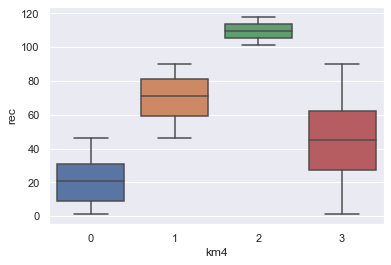

In [38]:
sns.boxplot(x='km4', y='rec',data=dff)

<AxesSubplot:xlabel='km4', ylabel='freq'>

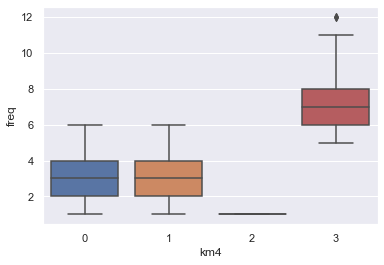

In [39]:
sns.boxplot(x='km4', y='freq',data=dff)

<AxesSubplot:xlabel='km4', ylabel='valor'>

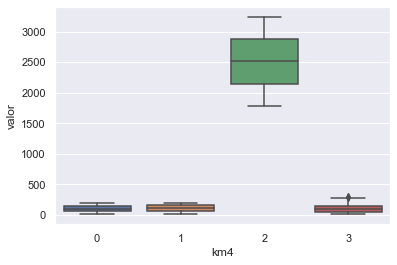

In [37]:
sns.boxplot(x='km4', y='valor',data=dff)

Text(0.5, 0, 'Frequência')

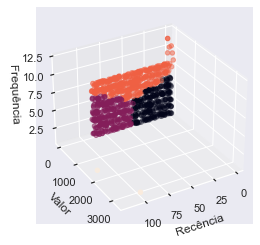

In [60]:
#Visualização dos clusters

fig = plt.figure()
ax = plt.axes(projection='3d')
xline=clusters_scaled['rec']
yline=clusters_scaled['freq']
zline=clusters_scaled['valor']

ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(30, 60)
ax.set_xlabel('Recência')
ax.set_ylabel('Valor')
ax.set_zlabel('Frequência')

In [ ]:
#Conclusões

#A partir das análises acima relacionadas pode-se verificar, a partir das médias nos boxplot
#que o resultado obtido com a utilização do K-means corresponde a segmentação realizada 
#inicialmente, em 4 clusters de clientes e se mostra bem satisfatória para o conjunto de dados apresentado.